In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import seaborn as sns
from itertools import product
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imutils import paths
from PIL import Image,ImageFilter,ImageOps


In [3]:
root_dir = "C:/Users/Nick's PC/Desktop/Pokemon/t1/"
files = os.path.join(root_dir)
print(files)
file_names = os.listdir(files)


print(file_names)


C:/Users/Nick's PC/Desktop/Pokemon/t1/
['bulbasaur', 'dratini', 'machoke', 'marowak']


In [4]:
file_in = str()
datas = []
classes = []
c = 1
k = 0
r = 0
for file_name in file_names:
    r = 0
    file_in = os.path.join(root_dir, file_names[k])
    #print(file_in)
    pics = os.listdir(file_in)
    #print('these are pics' , pics)
    for pic in pics:
        state = os.path.join(file_in, pics[r])
        image = Image.open(state)
        temp = np.asarray(image)
        temp = temp.flatten()
        
        datas.append(temp)
        classes.append(c)
        r +=1
     
    
    k += 1
    c += 1

print(len(datas))
print(classes)

182
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [5]:
k = 0
for data in datas:
    print('for pic:' , k , datas[k].shape)
    k += 1

for pic: 0 (6400,)
for pic: 1 (6400,)
for pic: 2 (6400,)
for pic: 3 (6400,)
for pic: 4 (6400,)
for pic: 5 (6400,)
for pic: 6 (6400,)
for pic: 7 (6400,)
for pic: 8 (6400,)
for pic: 9 (6400,)
for pic: 10 (6400,)
for pic: 11 (6400,)
for pic: 12 (6400,)
for pic: 13 (6400,)
for pic: 14 (6400,)
for pic: 15 (6400,)
for pic: 16 (6400,)
for pic: 17 (6400,)
for pic: 18 (6400,)
for pic: 19 (6400,)
for pic: 20 (6400,)
for pic: 21 (6400,)
for pic: 22 (6400,)
for pic: 23 (6400,)
for pic: 24 (6400,)
for pic: 25 (6400,)
for pic: 26 (6400,)
for pic: 27 (6400,)
for pic: 28 (6400,)
for pic: 29 (6400,)
for pic: 30 (6400,)
for pic: 31 (6400,)
for pic: 32 (6400,)
for pic: 33 (6400,)
for pic: 34 (6400,)
for pic: 35 (6400,)
for pic: 36 (6400,)
for pic: 37 (6400,)
for pic: 38 (6400,)
for pic: 39 (6400,)
for pic: 40 (6400,)
for pic: 41 (6400,)
for pic: 42 (6400,)
for pic: 43 (6400,)
for pic: 44 (6400,)
for pic: 45 (6400,)
for pic: 46 (6400,)
for pic: 47 (6400,)
for pic: 48 (6400,)
for pic: 49 (6400,)
for pic: 5

In [6]:
X = datas
y = classes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99, stratify = y)
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [7]:
print(y_pred)

[3 4 4 2 3 4 2 2 4 2 3 3 4 2 2 4 2 3 2 1 3 1 4 3 1 3 1 2 4 1 1 1 1 4 1 1 4
 3 3 1 1 4 1 1 4 1 1 2 2 1 1 3 2 3 3 3 1 1 4 3 4]


In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8524590163934426


Text(0.5, 1.0, 'Accuracy confusion matrix')

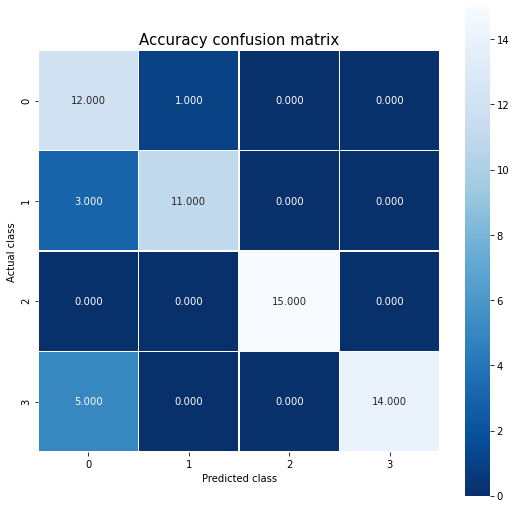

In [9]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Accuracy confusion matrix',size=15)

In [10]:
k_values = [i for i in range (1,31)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    

Text(0.5, 1.0, 'Total K accuracys')

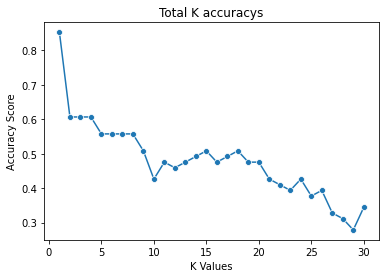

In [11]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title('Total K accuracys')